# Investigate a Dataset
#### What to include in your submission

1. PDF or HTML file containing your analysis. This file should include:
    * note specifying which dataset you analyzed
    * statement of the question(s) you posed
    * description of what you did to investigate those questions
    * Documentation of any data wrangling you did
    * Summary statistics and plots communicating your final results
2. Code you used to perform your analysis. If you used an iPython notebook, you can submit your .ipynb. Otherwise, you should submit the code separately in .py file(s).
3. list of Web sites, books, forums, blog posts, github repositories, etc. that you referred to or used in creating your submission (add N/A if you did not use any such resources).

### Introduction
The project below is to investigate a few features and try to answer the questions:
* What is the important variable are the survival factors from Titanic?

It plot and exam both single variable on survival probability and compare variables' relative impact.  

#### Report structure:
1. Dataset description
2. Data cleaning and processing
3. Variable investigation:
    * Sex (plot and t-test)
        * Is Sex a significant factor affecting survivalship?
    * Pclass (plot and t-test)
        * Is boarding class a significant factor affecting survivalship?
    * compare Sex and PClass (plot)
        * If yes for both above, which factor is a stronger factor?
    * Age (plot and t-test)
        * Is Age a significant factor affecting surivalship?
    * FamilySize (plot)
        * How FamilySize affecting survivalship?
4. Conclusion

### Dataset Description
Titanic.csv  https://www.kaggle.com/c/titanic/download/train.csv

Contains demographics and passenger information from 891 of the 2224
passengers and crew on board the Titanic. You can view a description of this dataset on the Kaggle website, where the data was obtained.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
plt.style.use('ggplot')
titanic = pd.read_csv("Titanic.csv",index_col=0)

In [2]:
#Peep the dataset
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Cleaning and processing

Let's construct a new data set with some data cleaning:

Dependent varible:
* "SurvivalTag", read from Suvivied column

Independent variables:

* Pclass - represent pasenger class
* Sex - male=1 and female=0
* Age - as it is
* FamilySize = SibSp+Parch - the sum family number onboard

Other variables are not used.

In [11]:
df = pd.DataFrame()
df['SurvivalTag'] = titanic.Survived
df['Pclass'] = map(int,titanic.Pclass)
df['Sex'] = map(int,titanic.Sex=="male") 
df['Age'] = titanic.Age.dropna()
df['FamilySize'] = map(int,titanic.SibSp + titanic.Parch +1)
#summary of new dataset
df.describe()

,SurvivalTag,Pclass,Sex,Age,FamilySize
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,1.904602
std,0.486592,0.836071,0.477990,14.526497,1.613459
min,0.000000,1.000000,0.000000,0.420000,1.000000
25%,0.000000,2.000000,0.000000,NaN,1.000000
50%,0.000000,3.000000,1.000000,NaN,1.000000
75%,1.000000,3.000000,1.000000,NaN,2.000000
max,1.000000,3.000000,1.000000,80.000000,11.000000


In [4]:
#Device into two sub-groups for feature selection.
survival_df = df[df.SurvivalTag==1]
victim_df = df[df.SurvivalTag==0]

### Features

First, plot invetigate single feature

Then, I will run two-sample t-test on some features (Pclass, Sex, Age) to identify significante feature. Null hypothesis is that the feature's average value is not different between two population group. If the null hypothesis is rejected at Confident Interval=99%, then the feature will be selected for future research.

#### Pclass
Histogram findings:
* Victims are biased to lower class passengers
* Survivals are biased to higher class passengers

t-statics gives 2.9e-23, which rejects the null hypothesis, so Pclass will selected feature

t-test on Pclass:
Ttest_indResult(statistic=-10.336953406118893, pvalue=2.9111554993758305e-23)


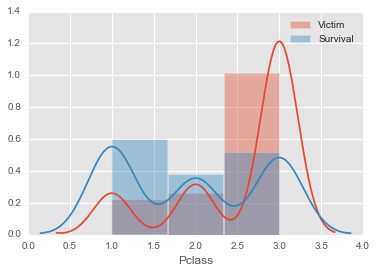

In [5]:
#### Pclass
sns.distplot(victim_df.Pclass,bins=3,label='Victim')
sns.distplot(survival_df.Pclass,bins=3,label='Survival')
plt.legend()
print("t-test on Pclass:")
print(stats.ttest_ind(survival_df.Pclass,victim_df.Pclass,equal_var=False))

#### Sex
Barchart findings:
* Victime groups have larger percentage of male passengers compared with survival passengers.

t-test shows it strongly reject the null hypothesis (Pvalue=1.2e-58, and Sex will be a selected feature.

t-test on Sex:
Ttest_indResult(statistic=-18.134562886672249, pvalue=1.2437937770621508e-58)


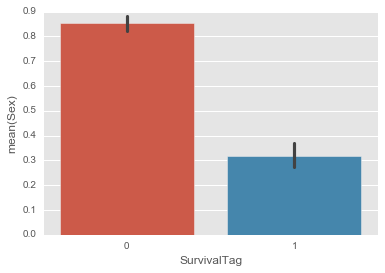

In [6]:
#### Sex
sns.barplot('SurvivalTag','Sex',data=df)
print("t-test on Sex:")
print(stats.ttest_ind(survival_df.Sex,victim_df.Sex,equal_var=False))

#### Compare Sex  and Pclass
Plot bar chart to show the impact of Sex and Pclass on Survival.  This chart will include information above on single variable analysis for Sex and Pclass, it also compare the relative impact between these two. 
* Higher Pclass will have higher survival probability.
* Female passengers will have higher surival probability.
* Sex is much more strong factor than Pclass, that we see that all femal has greater survival probabilty than male.

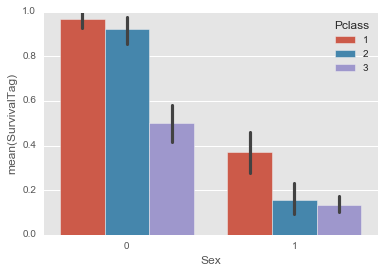

In [10]:
# Compare Sex  and Pclass
sns.barplot(x='Sex',y='SurvivalTag',hue='Pclass',data=df)

#### Age
Age fields are missing from some passengers so i will drop those without Age information when plotting and conduct the t-statistic.

Histogram findings:
* Overall there is the age distribution are similar between Victim and Survival group
* There is peak in very young age at survival group.

t-test gives Pvalue=0.39 so it does not reject the null hypothesis at 99% CI, so Age will not a be selected as a feature.

t-test on Age:
Ttest_indResult(statistic=-2.0666869462538102, pvalue=0.039124654013482488)


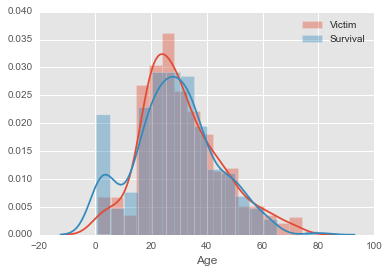

In [8]:
#### Age
sns.distplot(victim_df.Age.dropna(),label='Victim')
sns.distplot(survival_df.Age.dropna(),label='Survival')
plt.legend()
print("t-test on Age:")
print(stats.ttest_ind(survival_df.Age.dropna(),victim_df.Age.dropna(),equal_var=True))

#### FamilySize
Plot findings:
* Victims are biased to singles (FamilySize=1)
* Victims are also biased to very large mily (FmialySize>5)
* Survivals are biased to medium family (Family size between 2 and 4)

Limitation: t-test cannot be used since we are not intersted in the population mean.  Non-linear staistics should be used for FamilySize variable.

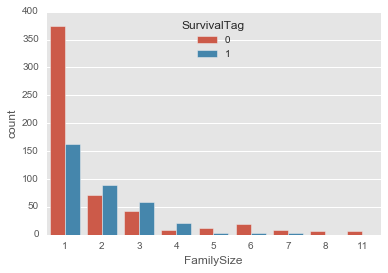

In [9]:
sns.countplot(x='FamilySize',hue='SurvivalTag',data=df)

### Conclusion:
To conclude the answers:
* Is Sex a significant factor affecting survivalship?
    * Yes, it is shown in both plot and t-test
* Is boarding class a significant factor affecting survivalship?
    * Yes, it is shown in both plot and t-test
* If yes for both above, which factor is a stronger factor?
    * As shown in plot, Sex is stronger factor than Pclass.
* Is Age a significant factor affecting surivalship?
    * Generally not, but for Infants they has much higher survival probability.
* How FamilySize affecting survivalship?
    * Both singles and large family has lower survival probability but medium family is favored. 

#### Reference
* https://www.kaggle.com/c/titanic/data
